In [1]:
import rdp
import gpxpy
import mplleaflet
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

### Lets start with a simple track

In [2]:
traverse = np.array([[0., 1.], [0.3, 0.6], [2., 0.], [3.8, 0.65], [5.6, 0.9], [6.3, 0.86], [7.1, 0.61], [10., 0.95]])

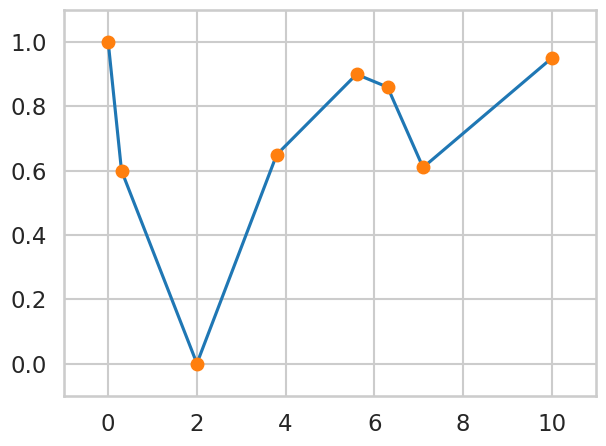

In [3]:
fig = plt.figure()
plt.plot(traverse[:,0], traverse[:,1])
plt.plot(traverse[:,0], traverse[:,1], 'o')
fig.tight_layout()

### and use Ramer-Douglas-Peucker to simplify

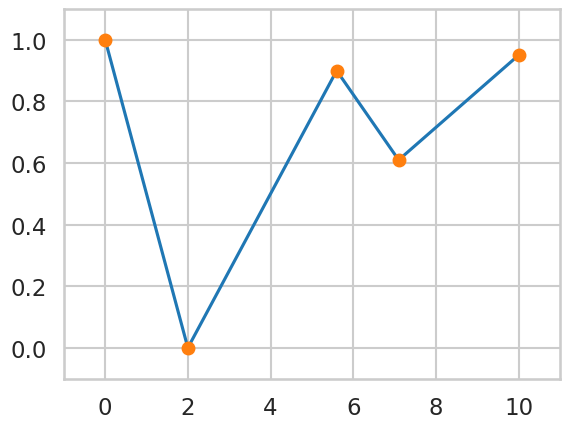

In [4]:
smoothed_traverse = rdp.rdp(traverse, epsilon=0.3)

plt.plot(smoothed_traverse[:,0], smoothed_traverse[:,1])
plt.plot(smoothed_traverse[:,0], smoothed_traverse[:,1], 'o')

### Same procedure but this time a real-word GPS track

In [5]:
from helpers import *
gpx_files = list_gpx_files()
gpx_file = load_gpx_file(gpx_files, 2)

/home/dg/GitHubUbuntU/gps_data_with_python/gpx/3-laender-giro.gpx
/home/dg/GitHubUbuntU/gps_data_with_python/gpx/3-laender-giro_cleaned.gpx
/home/dg/GitHubUbuntU/gps_data_with_python/gpx/activity_11212422262.gpx
/home/dg/GitHubUbuntU/gps_data_with_python/gpx/hh_marathon.gpx


In [6]:
segment = gpx_file.tracks[0].segments[0]
coords = pd.DataFrame([{'lat': p.latitude, 'lon': p.longitude} for p in segment.points])

### but the next line breaks!!!

In [7]:
rdp.rdp(coords.values)

array([[41.13865586, 29.02854645],
       [41.1385339 , 29.02859808],
       [41.13847121, 29.02863622],
       ...,
       [41.13899407, 29.02884937],
       [41.13898099, 29.02878734],
       [41.13897638, 29.02876806]])

### Lesson learned: never use tail recursion in Python since CPython has no optimization!

In [8]:
from gps_utils import rdp

In [9]:
simplified_coords = rdp(coords[['lon', 'lat']].values, 0.0001)
print("{} gps points simplified to {} points".format(coords.shape[0], simplified_coords.shape[0]))

987 gps points simplified to 112 points


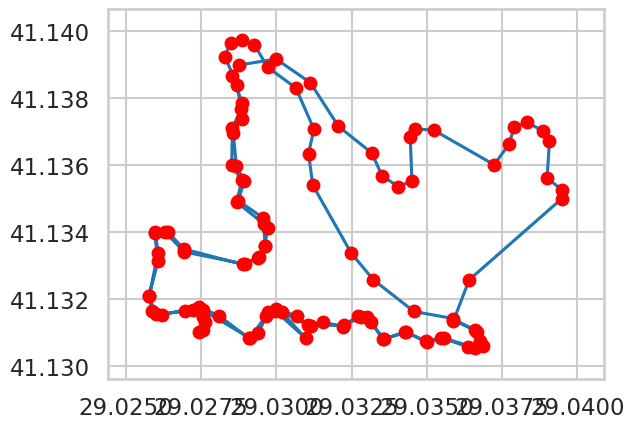

In [10]:
fig = plt.figure()
plt.plot(simplified_coords[:,0], simplified_coords[:,1])
plt.plot(simplified_coords[:,0], simplified_coords[:,1], 'ro')

In [11]:
mplleaflet.display(fig=fig)

/home/dg/anaconda3/envs/gpxrun/lib/python3.10/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
